## importing libraries…

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plotly packages
import cufflinks as cf
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
## trying to visualize streets in traffic data set...
# import folium

# m = folium.Map(location=subset_df_start[0]) # seems to be pointing somewhere in Antarctica
# m
# m = folium.Map(location=subset_df_start[0])
# type(subset_df_start[0])
# ny_coords = [40.738, -73.98]
# m = folium.Map(location=ny_coords)
# m

## Subway ridership
CTA - Ridership - 'L' Station Entries (Socrata Open Data API) https://data.cityofchicago.org/resource/5neh-572f.json \
[SODA API docs for this dataset](https://dev.socrata.com/foundry/data.cityofchicago.org/5neh-572f)

This list shows daily totals of ridership, by station entry, for each 'L' station dating back to 2001. Dataset shows entries at all turnstiles, combined, for each station. Daytypes are as follows: W=Weekday, A=Saturday, U=Sunday/Holiday. See attached readme file for information on how these numbers are calculated.

('date' doesn't actually include timestamps, but format preserved here for later use)

`$where=date between '2021-10-10T12:00:00' and '2021-10-10T14:00:00'`\
`$where=stationname = 'Lawrence'`\
`$where=date > '2021-05-16'`\
`$where=stationname = 'Lawrence' AND date >'2021-05-16'`\
`$where=date > '2021-04-01' & $limit=50000` *currently yields 47619 rows since dataset ends at 2022-02-28*\
SODA queries default to 1000 datapoints, max to 50,000 in SODA 2.0 API (no limit in SODA 2.1)

Encode to UTF-8 with [URL Encoder](https://www.urlencoder.org/)\
[Markdown cheatsheet](https://www.markdownguide.org/cheat-sheet)

In [ ]:
url = 'https://data.cityofchicago.org/resource/5neh-572f.json?$where=stationname%20%3D%20%27Lawrence%27'
url = 'https://data.cityofchicago.org/resource/5neh-572f.json?$where=stationname%20%3D%20%27Lawrence%27%20AND%20date%20%3E%272021-05-16%27'

subway_df = pd.read_json(url)
subway_df.head()

In [ ]:
subway_df.describe()

In [ ]:
subway_df.sort_values(by=['date'], ascending=False)

## Interesting questions to pursue
- Which stations have the highest gate counts per day?
- What happens when we split by rush hour vs not rush hour? *(can't do with this datset)*
- Which stations are most heavily used?

In [2]:
url = 'https://data.cityofchicago.org/resource/5neh-572f.json?$where=date%20%3E%272021-04-01%27&$limit=50000'

subway_df = pd.read_json(url)
subway_df.head()

,station_id,stationname,date,daytype,rides
0,40010,Austin-Forest Park,2021-04-02,W,466
1,40020,Harlem-Lake,2021-04-02,W,1153
2,40030,Pulaski-Lake,2021-04-02,W,637
3,40040,Quincy/Wells,2021-04-02,W,740
4,40050,Davis,2021-04-02,W,957


In [ ]:
subway_df.sort_values(by=['date'], ascending=False, inplace=True) # sorts actual df, not copy
subway_df.describe()

In [ ]:
subway_df.columns

Text(0.5, 1.0, 'Boxplot of Stations vs Number of Rides')

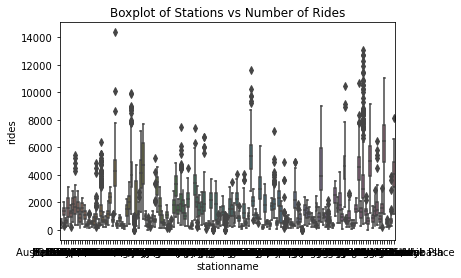

In [3]:
# check how data are distributed
sns.boxplot(x='stationname', y='rides', data=subway_df)
plt.title('Boxplot of Stations vs Number of Rides')
# len(subway_df['stationname'].unique()) # 143 unique stations
# too many to visualize, need to get outliers

In [22]:
# check what amount of rides make the threshold for each percentile
subway_df['rides'].quantile([0.015,0.5,0.99])

0.015     102.00
0.500     964.00
0.990    6655.82
Name: rides, dtype: float64

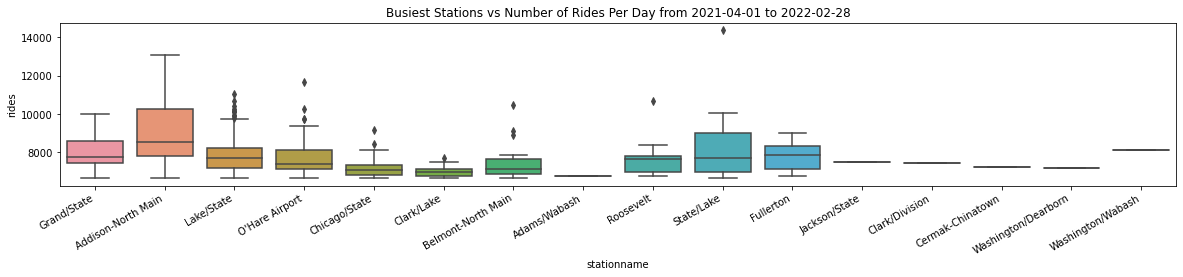

In [23]:
# L train stations with the most rides per day
# 99th percentile chosen to keep plot from being too crowded
busiest_subway_df = subway_df[subway_df['rides'] > subway_df['rides'].quantile(0.99)]

sns.boxplot(x='stationname', y='rides', data=busiest_subway_df)
plt.title('Busiest Stations vs Number of Rides Per Day from 2021-04-01 to 2022-02-28')
plt.xticks(rotation=30, ha='right');
plt.rcParams["figure.figsize"] = (20,3)
#consider outliers-- every dot is a day. So if there's an outlier, it might be a special holiday

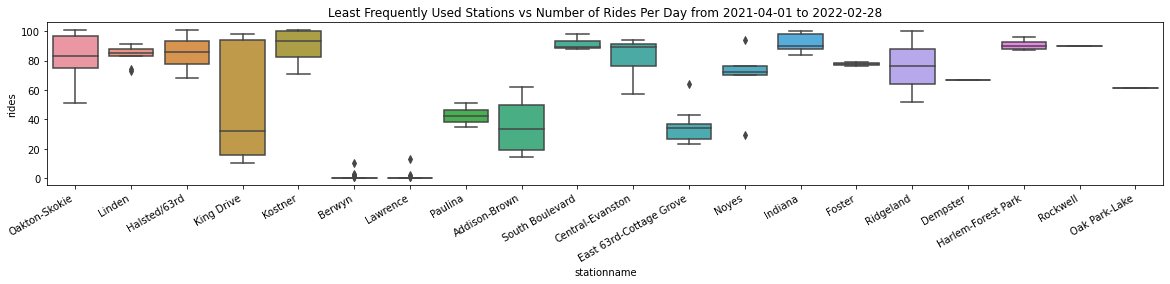

In [25]:
# L train stations with the fewest rides per day
# 1.5th percentile chosen to keep plot from being too crowded
quietest_subway_df = subway_df[subway_df['rides'] < subway_df['rides'].quantile(0.015)]

sns.boxplot(x='stationname', y='rides', data=quietest_subway_df)
plt.title('Least Frequently Used Stations vs Number of Rides Per Day from 2021-04-01 to 2022-02-28')
plt.xticks(rotation=30, ha='right');
plt.rcParams["figure.figsize"] = (20,3)

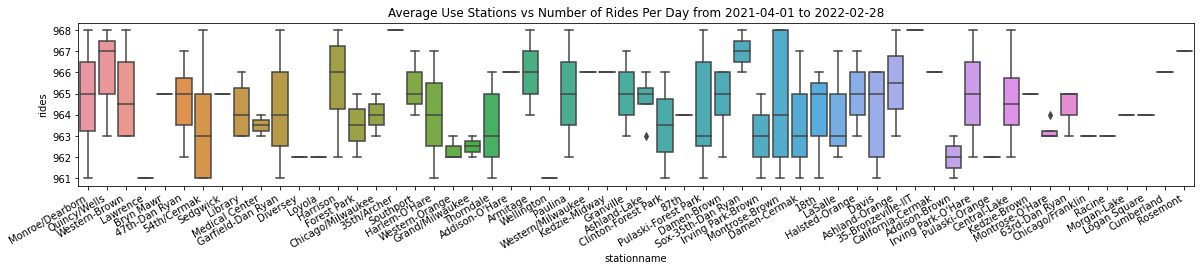

In [26]:
# L train stations with an average amount of rides per day
# range between 49.8th and 50.2nd percentiles chosen to keep plot from being too crowded
typical_subway_df = subway_df[(subway_df['rides'] > subway_df['rides'].quantile(0.498)) & 
                              (subway_df['rides'] < subway_df['rides'].quantile(0.502))]

sns.boxplot(x='stationname', y='rides', data=typical_subway_df)
plt.title('Average Use Stations vs Number of Rides Per Day from 2021-04-01 to 2022-02-28')
plt.xticks(rotation=30, ha='right');
plt.rcParams["figure.figsize"] = (20,3)

In [ ]:
# # figure sizing
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] # reset figure sizing to default (seems to be 6.4,4.8)
# plt.rcParamsDefault["figure.figsize"] = [6,4] # this was the figure size after running the busiest & quietest cases
# fig_width, fig_height = plt.gcf().get_size_inches() # find out current figure size
# print(fig_width, fig_height)

## Suggested next steps
for 1 station:
- (boxplot) avg ridership in timeframe per day from Monday to Sunday\
how to retrieve day of week from date string in Python?
- create directed graph of how each station makes up an L train line\
Chicago data portal has these as kml --> how to convert to graph in order to model resilience?

busiest stations, State/Lake, seems to have massive outlier when ridership goes up exponentially --> **why is this?**

In [42]:
busiest_subway_df[busiest_subway_df['stationname'].str.contains('State/Lake')]

,station_id,stationname,date,daytype,rides
18184,40260,State/Lake,2021-08-07,A,14381
18327,40260,State/Lake,2021-08-08,U,8678
21187,40260,State/Lake,2021-08-28,A,10079
21330,40260,State/Lake,2021-08-29,U,7636
23046,40260,State/Lake,2021-09-10,W,7000
23904,40260,State/Lake,2021-09-16,W,6685
24047,40260,State/Lake,2021-09-17,W,7769
24190,40260,State/Lake,2021-09-18,A,6993


In [43]:
# try to parse exact weekday from historic date
pd.to_datetime(busiest_subway_df[busiest_subway_df['stationname'].str.contains('State/Lake')].date).dt.dayofweek

18184    5
18327    6
21187    5
21330    6
23046    4
23904    3
24047    4
24190    5
Name: date, dtype: int64